<a href="https://colab.research.google.com/github/ritsika/person-identification/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
!pip uninstall keras-preprocessing
!pip install git+https://github.com/keras-team/keras-preprocessing.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/keras-team/keras-preprocessing.git to /tmp/pip-req-build-uh4xbmq_
  Running command git clone --filter=blob:none --quiet https://github.com/keras-team/keras-preprocessing.git /tmp/pip-req-build-uh4xbmq_
  Resolved https://github.com/keras-team/keras-preprocessing.git to commit 3e380065d4afc7347aaee8d89325a16b22158438
  Preparing metadata (setup.py) ... done
  Created wheel for Keras-Preprocessing: filename=Keras_Preprocessing-1.1.2-py3-none-any.whl size=43617 sha256=5b563e93b9f75225d359552deeffa61839607deb2ac39cc8ee6160c3ffa890bb
  Stored in directory: /tmp/pip-ephem-wheel-cache-qi2khob4/wheels/72/0b/c7/3f6b26f2d789c712867e02502e1f1b740091f8615f32a9f870
Successfully built Keras-Preprocessing


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from zipfile import ZipFile
file_name = '/content/processed_dataset1.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


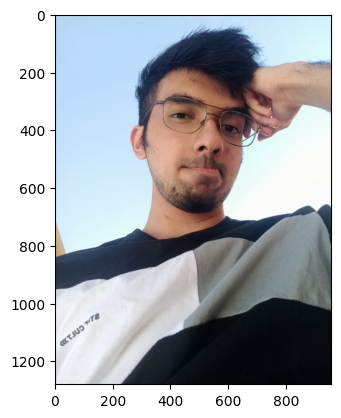

In [ ]:
img=image.load_img("/content/processed_dataset/train/akash/WhatsApp Image 2023-06-04 at 6.58.50 PM.jpeg")
plt.imshow(img)

In [ ]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [ ]:
# Create an ImageDataGenerator object
datagen = ImageDataGenerator()

# Load the data and generate batches
train_generator = datagen.flow_from_directory('/content/processed_dataset/train/', target_size=(224, 224), batch_size=32, class_mode='categorical')

# Determine the number of classes
num_classes = train_generator.num_classes

Found 21 images belonging to 3 classes.


In [ ]:
train_dataset=train.flow_from_directory('/content/processed_dataset/train',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='categorical')
validation_dataset=train.flow_from_directory('/content/processed_dataset/val',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='categorical')

Found 21 images belonging to 3 classes.
Found 6 images belonging to 3 classes.


In [ ]:
train_dataset.class_indices

{'abitha': 0, 'akash': 1, 'ritsika': 2}

In [ ]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),


                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Flatten(),

                                  tf.keras.layers.Dense(512,activation="relu"),

                                  tf.keras.layers.Dense(num_classes,activation='softmax')

                                  ])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [ ]:
model_fit=model.fit(train_dataset,
                    steps_per_epoch=3,
                    epochs=10,
                    validation_data=validation_dataset)

Epoch 1/10
3/3 [==============================] - 5s 1s/step - loss: 11.6340 - accuracy: 0.2222 - val_loss: 1.3968 - val_accuracy: 0.3333
Epoch 2/10
3/3 [==============================] - 2s 645ms/step - loss: 1.3155 - accuracy: 0.3333 - val_loss: 1.2077 - val_accuracy: 0.3333
Epoch 3/10
3/3 [==============================] - 3s 1s/step - loss: 1.2080 - accuracy: 0.4444 - val_loss: 1.1627 - val_accuracy: 0.3333
Epoch 4/10
3/3 [==============================] - 3s 1s/step - loss: 1.2760 - accuracy: 0.1111 - val_loss: 1.0843 - val_accuracy: 0.6667
Epoch 5/10
3/3 [==============================] - 2s 707ms/step - loss: 0.9755 - accuracy: 0.5556 - val_loss: 2.1839 - val_accuracy: 0.3333
Epoch 6/10
3/3 [==============================] - 2s 602ms/step - loss: 1.3034 - accuracy: 0.7778 - val_loss: 1.1110 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 2s 651ms/step - loss: 0.7237 - accuracy: 0.6667 - val_loss: 2.0305 - val_accuracy: 0.3333
Epoch 8/10
3/3 [============

In [ ]:
!pip install tflite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.6/123.6 kB 6.9 MB/s eta 0:00:00


In [ ]:
converter =tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()
with open('model.tflite','wb') as f:
  f.write(tflite_model)

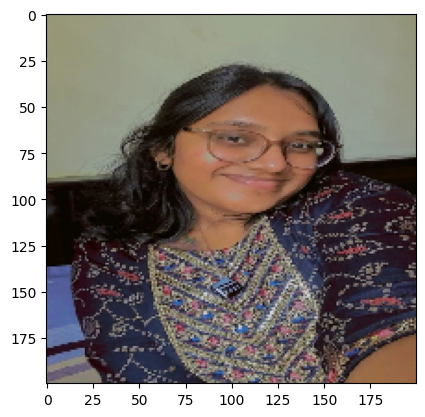

1/1 [==============================] - 0s 99ms/step
Predicted class: akash


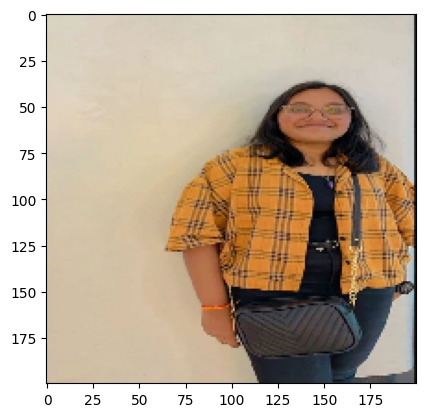

1/1 [==============================] - 0s 69ms/step
Predicted class: abitha


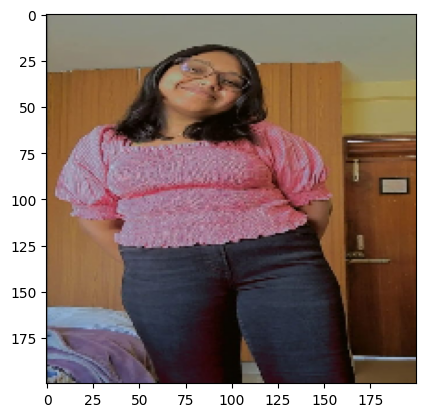

1/1 [==============================] - 0s 213ms/step
Predicted class: abitha


In [ ]:
dir_path = '/content/processed_dataset/test/abitha/'
for i in os.listdir(dir_path):
  img = image.load_img(dir_path + '/' + i, target_size=(200, 200))
  plt.imshow(img)
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = x / 255.0  # Normalize the image

  prediction = model.predict(x)

  predicted_class_index = np.argmax(prediction)

  class_names = list(train_dataset.class_indices.keys())
  predicted_class = class_names[predicted_class_index]

  print("Predicted class:", predicted_class)

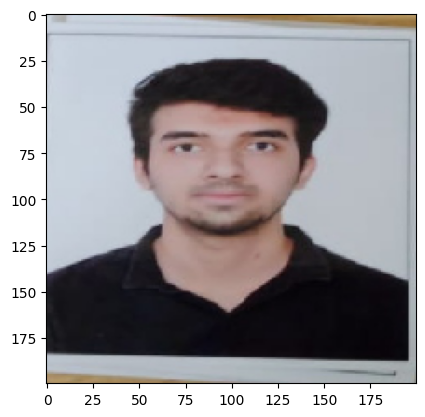

1/1 [==============================] - 0s 80ms/step
Predicted class: akash


In [ ]:
image_path = '/content/IMG_20230606_004500.jpg'  # Replace with the path to your image

img = image.load_img(image_path, target_size=(200, 200))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalize the image

prediction = model.predict(x)
predicted_class_index = np.argmax(prediction)

class_names = list(train_dataset.class_indices.keys())
predicted_class = class_names[predicted_class_index]

print("Predicted class:", predicted_class)